In [8]:
import pandas as    pd

In [9]:
true_data = pd.read_csv('./../processed_VideoCommentsThreatCorpus.csv')
true_data['flags'] = true_data['flags'].apply(lambda x: int(eval(x)[0]))

# pred_data = pd.read_csv('collected_context_with_agents.csv')
# pred_data = pd.read_csv('collected_with_agents.csv')
# pred_data = pd.read_csv('collected_with_agents_wizardllm.csv')
pred_data = pd.read_csv('collected_neighbors.csv')
# pred_data = pd.read_csv('collected_testdata.csv')

In [10]:
print(true_data.head())
print(pred_data.head())



    id  flags                                            content  video_num  \
0  1_1      1  It's because Europeans do not want to change t...          1   
1  1_2      0  ISLAM – A Simple, Humanitarian and Attractive ...          1   
2  1_3      0  ISLAM has overtaken Roman Catholicism as the b...          1   
3  1_4      1  All it means is there will be more of you to k...          1   
4  1_5      0   People should know when they are conquered ...\n          1   

   num_posts  
0        427  
1        427  
2        427  
3        427  
4        427  
  document_id  num_posts_in_conversation  conversation_length  violence_label  \
0      4_1330                     9808.0                 9808               2   
1      4_1331                     9808.0                 9808               0   
2      4_1332                     9808.0                 9808               1   
3      4_1333                     9808.0                 9808               0   
4      4_1334                 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_predictions(df1: pd.DataFrame, df2: pd.DataFrame):
    df2['violence_label'] = df2['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1)

  
    # Merge on id and document_id
    merged_df = df1.merge(df2, left_on='id', right_on='document_id', suffixes=('_flags', '_violence'))
    
    # Extract labels
    y_true = merged_df['flags']
    y_pred = merged_df['violence_label']
    
    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    
    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)
    
    # Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Plot distribution of true and predicted labels
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=y_true, ax=ax[0], palette='viridis')
    ax[0].set_title('True Label Distribution')
    ax[0].set_xticklabels(['Non-Violent', 'Violent'])
    
    sns.countplot(x=y_pred, ax=ax[1], palette='magma')
    ax[1].set_title('Predicted Label Distribution')
    ax[1].set_xticklabels(['Non-Violent', 'Violent'])
    
    plt.show()

    misclassified = merged_df[y_true != y_pred]
    print("\nMisclassified Samples:")
    print(misclassified[['id', 'document_id', 'flags', 'violence_label']])
    
# Example usage:
# df1 = pd.read_csv('true_data.csv')  # Load first dataframe
# df2 = pd.read_csv('predicted_data.csv')  # Load second dataframe
# evaluate_predictions(df1, df2)


Accuracy: 0.9505
Precision: 0.9486
Recall: 0.9505
F1 Score: 0.9493

Confusion Matrix:
 [[89  2]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.78      0.70      0.74        10

    accuracy                           0.95       101
   macro avg       0.87      0.84      0.85       101
weighted avg       0.95      0.95      0.95       101



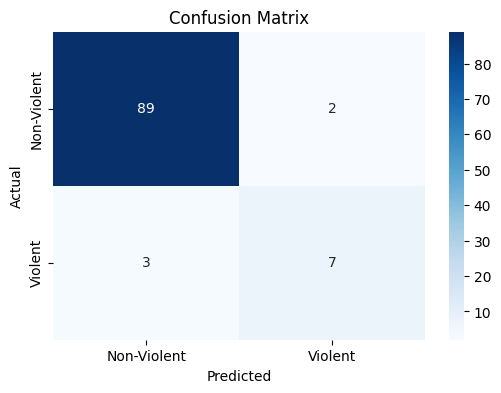

C:\Users\Elias\AppData\Local\Temp\ipykernel_10932\1188950402.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, ax=ax[0], palette='viridis')
C:\Users\Elias\AppData\Local\Temp\ipykernel_10932\1188950402.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_10932\1188950402.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, ax=ax[1], palette='magma')
C:\Users\Elias\AppData\Local\Temp\ipykernel_10932\1188950402.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of t

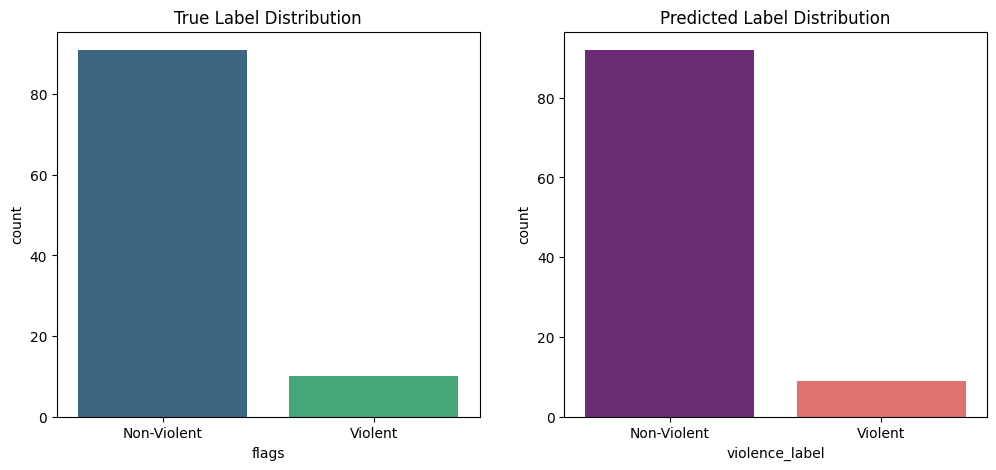

In [12]:
evaluate_predictions(true_data, pred_data)

Flagged Issues Count:
0    69
Name: count, dtype: int64


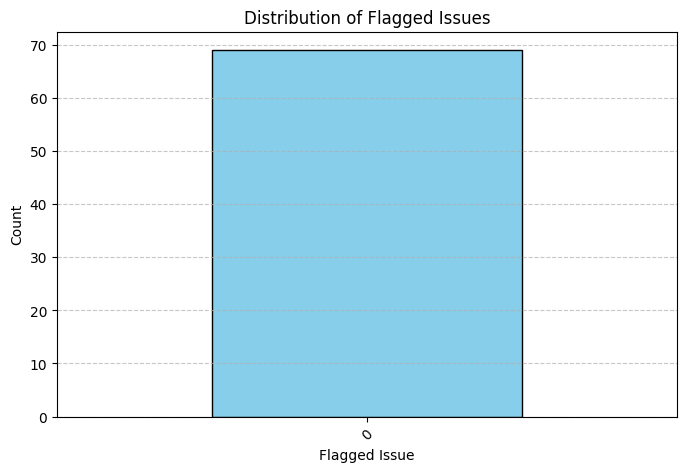

In [13]:
# Ensure flagged_issues is interpreted as lists
pred_data["flagged_issues"] = pred_data["flagged_issues"].apply(eval)

# Flatten the flagged issues into a single list
all_flags = [item for sublist in pred_data["flagged_issues"] for item in sublist]

# Count occurrences of each flag
flag_counts = pd.Series(all_flags).value_counts()

# Display statistics
print("Flagged Issues Count:")
print(flag_counts)

# Plot the distribution of flagged issues
plt.figure(figsize=(8, 5))
flag_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Flagged Issues")
plt.xlabel("Flagged Issue")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Identify wrongly labeled predictions
   